In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [2]:
day_data= pd.read_csv('day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
day_data['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

<Figure size 1440x864 with 0 Axes>

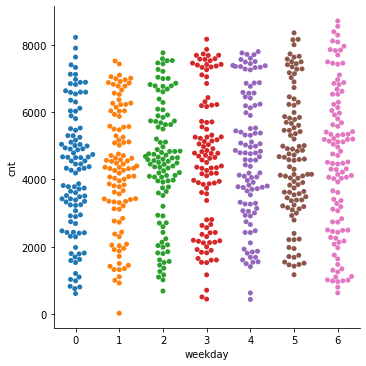

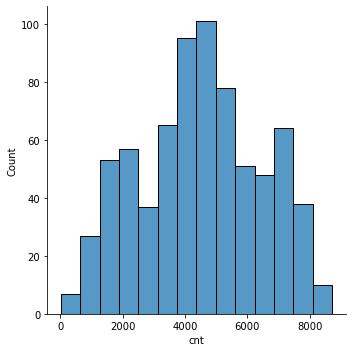

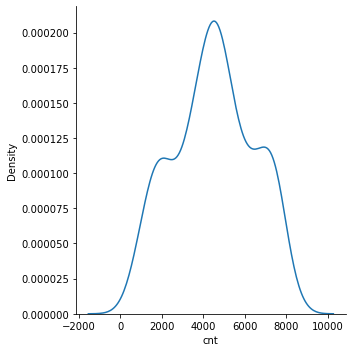

In [79]:
plt.figure(figsize=(20,12))
sns.catplot(data=day_data, kind='swarm', x='weekday', y='cnt')
sns.displot(data= day_data, x= 'cnt')
sns.displot(day_data, x= 'cnt', kind='kde')

In [24]:
day_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Distribution of workingday
    Ofcourse we have more working days rather than non working day.

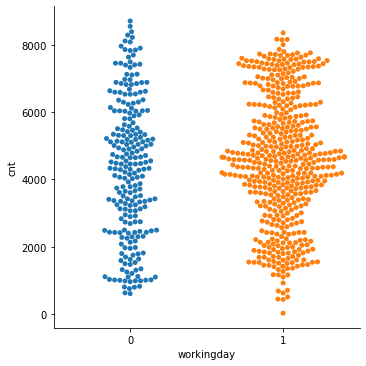

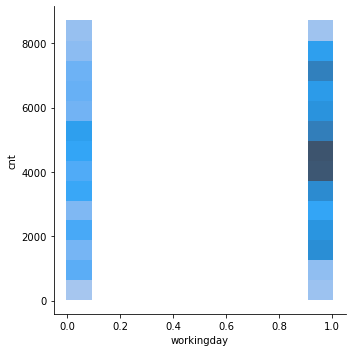

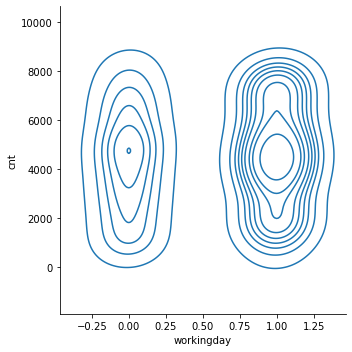

In [83]:
sns.catplot(data= day_data, x='workingday', y='cnt', kind='swarm')
sns.displot(day_data, x='workingday', y= 'cnt')
sns.displot(day_data, x='workingday', y='cnt', kind= 'kde')

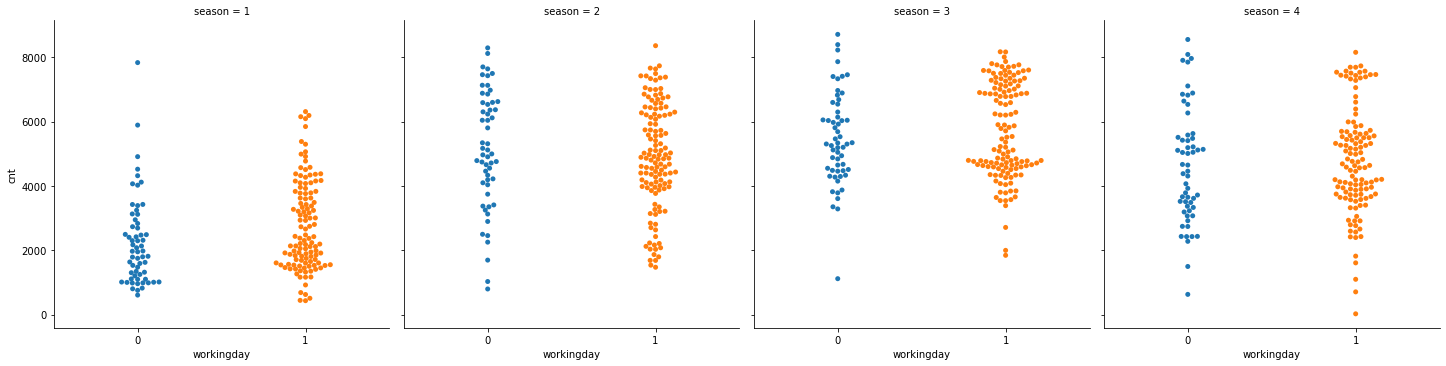

In [34]:
sns.catplot(data= day_data, x='workingday', y='cnt', kind='swarm', col= 'season')

#### 
    It's clearly visible now season 1 records low booking in a day in comparision with other three season.
    Season 3 records highest number of booking in a day.

In [31]:
day_data['cnt'].max()

8714

#### Let's see impact of season

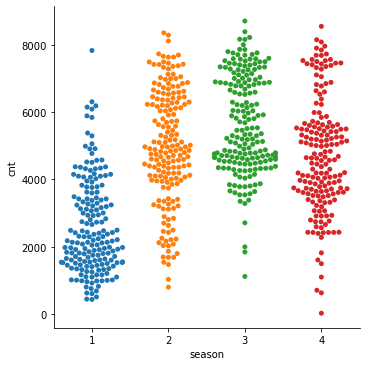

In [32]:
sns.catplot(data=day_data, x='season', y= 'cnt', kind= 'swarm')

### 
    Now we can see that here huge impact of season, in season 1 only few days record over 6000 of boking wheather other 3 season records over 4000 of booking nearly every day. Here we can say that bike rental is in its peak in season 3.

####  Let's see weather impact on bike rental

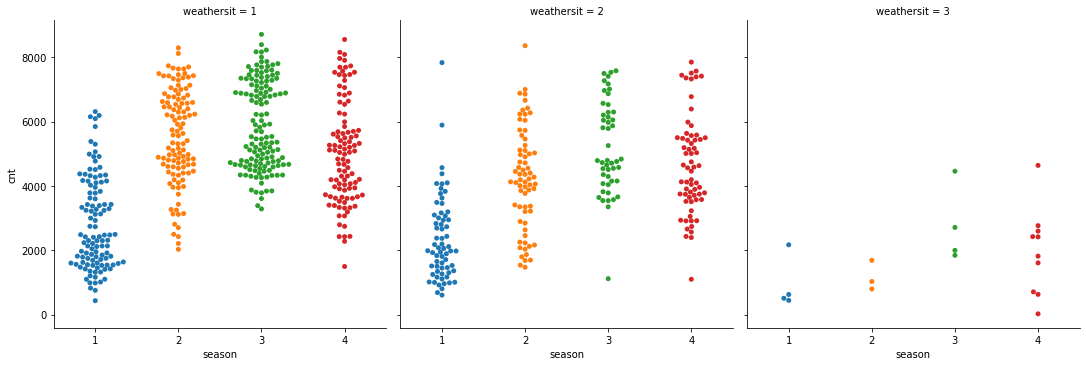

In [36]:
sns.catplot(data=day_data, x='season', y= 'cnt', kind= 'swarm', col='weathersit')

### 
    Bad weather impact almost every outdoor games, here it also reduces bike sharing. when weathersit is 3(bad weather) bike sharing is record very low and other 2 performs well.

### Holiday
    holiday is not relevant here. Working day column already covers all the holiday, it not adds much information to the dataset. Let explore it through visualization

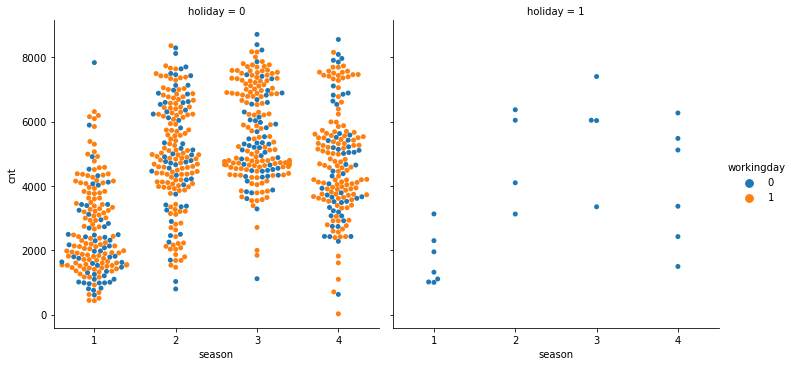

In [37]:
sns.catplot(data=day_data, x='season', y= 'cnt', kind= 'swarm', hue='workingday', col='holiday')

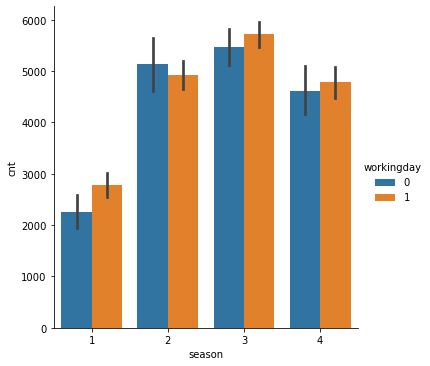

In [38]:
sns.catplot(data= day_data, x='season', y= 'cnt', hue='workingday', kind= 'bar')

### Casual and Registered users
    Univariate Analysis

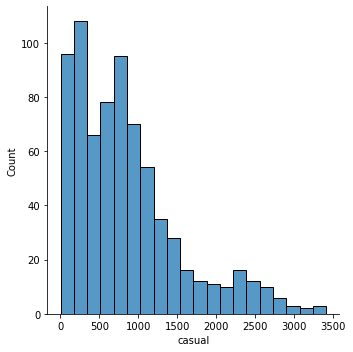

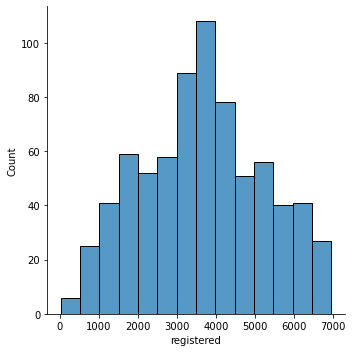

In [61]:
sns.displot(day_data, x='casual')
sns.displot(day_data, x='registered')

#### Density Estimation

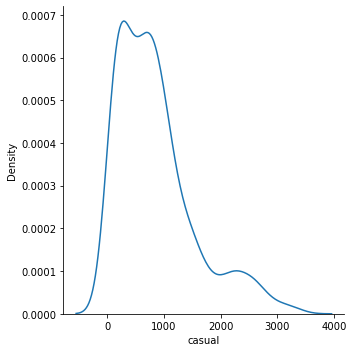

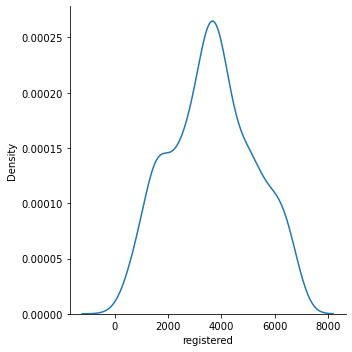

In [62]:
sns.displot(day_data, x='casual', kind= 'kde')
sns.displot(day_data, x='registered', kind= 'kde')

### temp, atemp, hum, windspeed

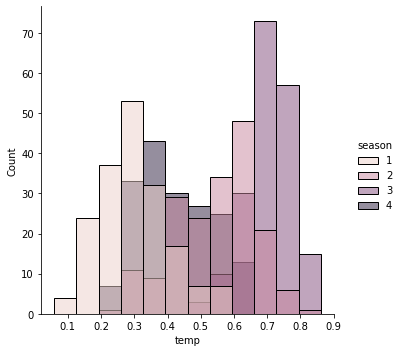

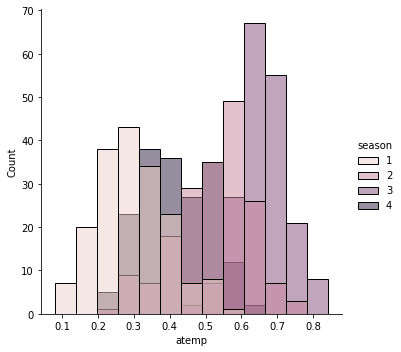

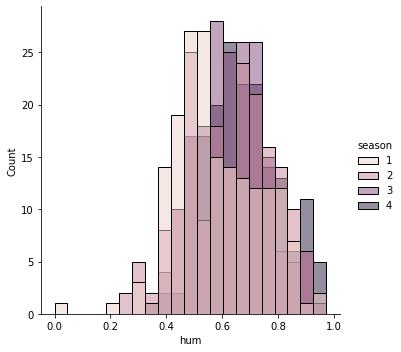

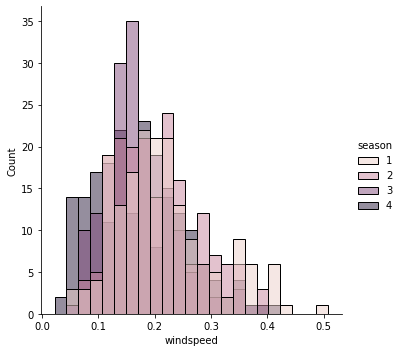

In [67]:
sns.displot(day_data, x='temp', hue='season')
sns.displot(day_data, x='atemp', hue='season')
sns.displot(day_data, x='hum', hue='season')
sns.displot(day_data, x='windspeed', hue='season')


    Season 1 records low temprature and earlier we have seen that bike sharing is comperatively low than other 3 season. 

#### Relation between temp and casual anb between temp and registered

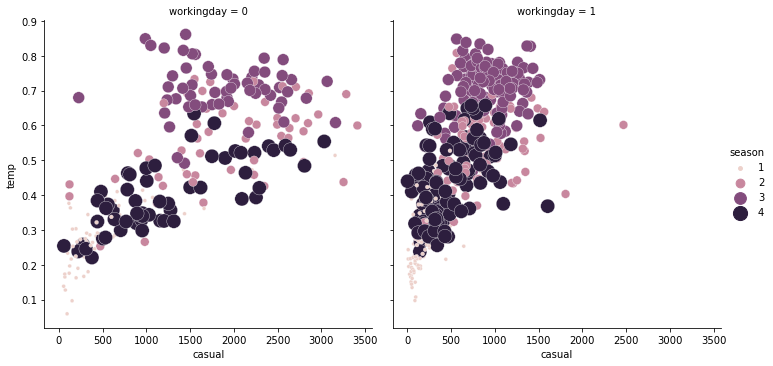

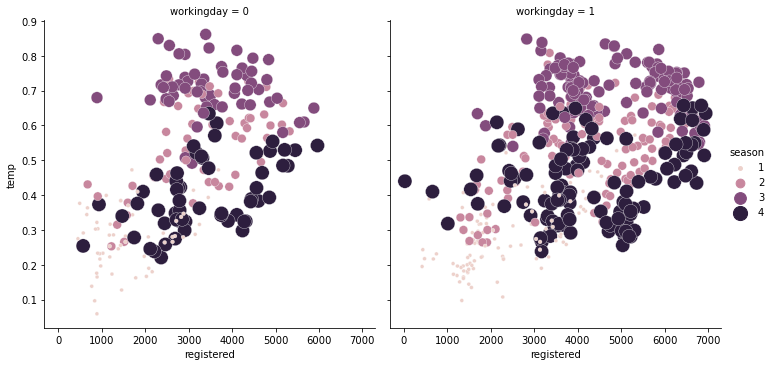

In [75]:
sns.relplot(data= day_data, x='casual', y='temp', hue='season', col='workingday', size= 'season', sizes= (15,200))
sns.relplot(data= day_data, x='registered', y='temp', hue='season', col='workingday', size= 'season', sizes= (15,200))

#### Relation between cauual and temp and registerd month vise

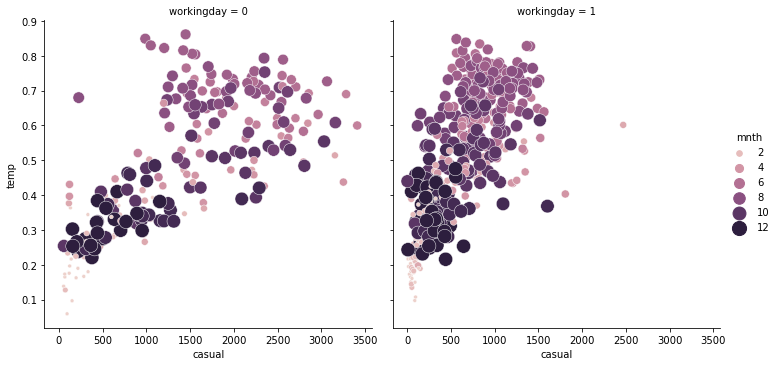

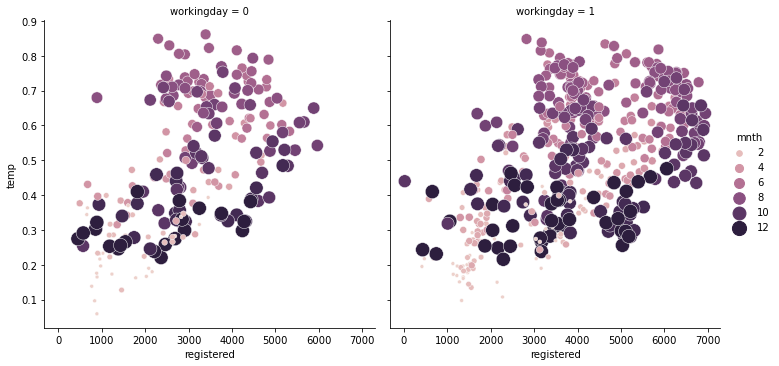

In [76]:
sns.relplot(data= day_data, x='casual', y='temp', hue='mnth', col='workingday', size= 'mnth', sizes= (15,200))
sns.relplot(data= day_data, x='registered', y='temp', hue='mnth', col='workingday', size= 'mnth', sizes= (15,200))

#### Users and windspeed
    Windspeed speed does not show much effect on the users 

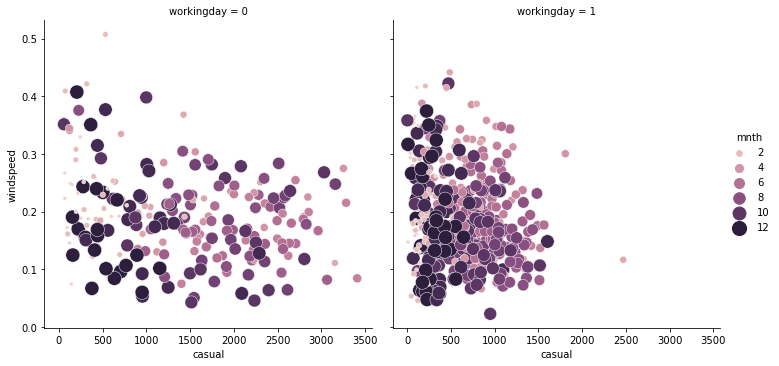

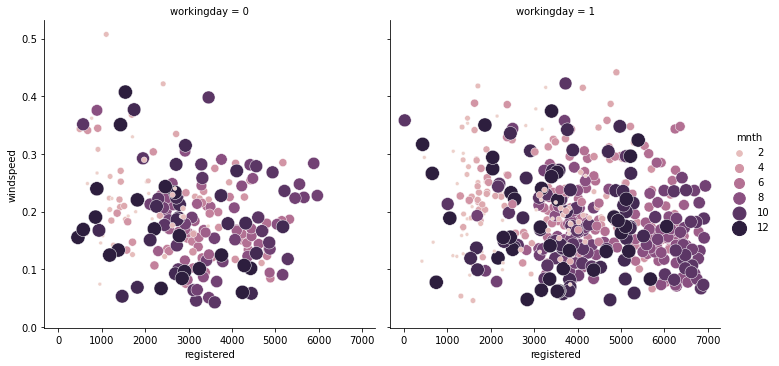

In [77]:
sns.relplot(data= day_data, x='casual', y='windspeed', hue='mnth', col='workingday', size= 'mnth', sizes= (15,200))
sns.relplot(data= day_data, x='registered', y='windspeed', hue='mnth', col='workingday', size= 'mnth', sizes= (15,200))

In [43]:
print('Average booking /day: ',day_data['casual'].mean())
print('Number of highest booking in a day: ', day_data['casual'].max())
print('Number of lowest record in a day: ', day_data['casual'].min())

Average booking /day:  848.1764705882352
Number of highest booking in a day:  3410
Number of lowest record in a day:  2


##### register

In [44]:
print('Average booking /day: ',day_data['registered'].mean())
print('Number of highest booking in a day: ', day_data['registered'].max())
print('Number of lowest record in a day: ', day_data['registered'].min())

Average booking /day:  3656.172366621067
Number of highest booking in a day:  6946
Number of lowest record in a day:  20


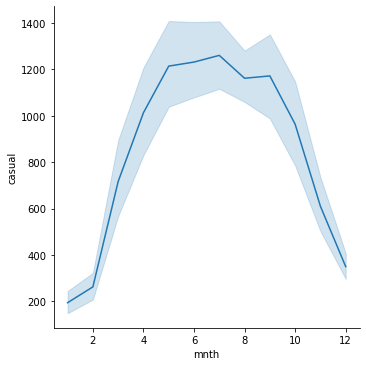

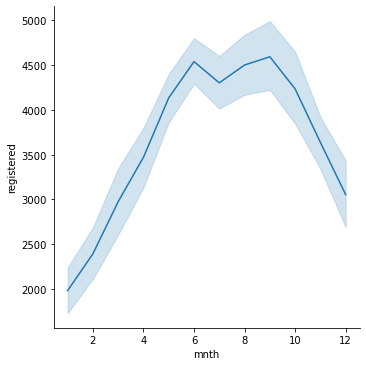

In [56]:
sns.relplot(data= day_data, x= 'mnth', y= 'casual', kind= 'line')
sns.relplot(data= day_data, x= 'mnth', y= 'registered', kind= 'line')

### 
    Casual users are less active in the first two month of the year but registered user less active till the
    fifth month of the year

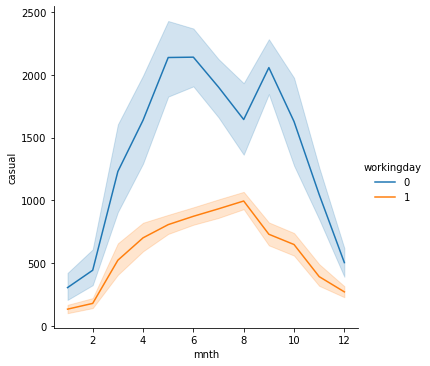

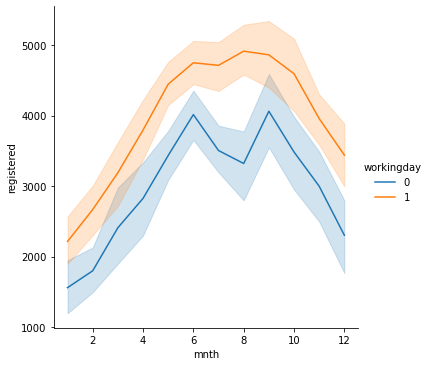

In [57]:
sns.relplot(data= day_data, x= 'mnth', y= 'casual', hue= 'workingday', kind= 'line')
sns.relplot(data= day_data, x= 'mnth', y= 'registered', hue= 'workingday', kind= 'line')

### 
    Here we found defining moment between caual user and registered user. On the holidays we seen that significant growth in casual users and fall on working day but in case of the registerd user its just opposite of the casual user with little gap on holiday vs working day

### Conclusion
    We explored all the features in dataset and found some features like season and weekday adds significant information to the dataset but features like windspeed hum and atemp not much important for the dataset. We have seen that too much casual user on holidays but very few on the working day. In the case of registered user, user more active on teh working day rather than holiday. In season 1 bike sharing experienced is in its lowest record while in season 3 record highest booking. Holiday feature not add much information, there is only nearly 20 holidays mentioned in feature. We experienced that registered user are quite stable in all season and all day while casual user impacted more as there frequency are totaly different in different season and on holiday and working day

### 
    We will remove all the features that does not play the role in feature importance. 
    The features are:
                    1- Instant
                    2- dteday
                    3- yr
                    4- windspeed
                    5- hum

### Create a regression model

In [114]:
# Removing unnecessary feature from the dataset
data= day_data.drop(['instant', 'dteday', 'yr', 'windspeed', 'hum', 'holiday'], axis= 1)
data.head()

,season,mnth,weekday,workingday,weathersit,temp,atemp,casual,registered,cnt
0,1,1,6,0,2,0.344167,0.363625,331,654,985
1,1,1,0,0,2,0.363478,0.353739,131,670,801
2,1,1,1,1,1,0.196364,0.189405,120,1229,1349
3,1,1,2,1,1,0.200000,0.212122,108,1454,1562
4,1,1,3,1,1,0.226957,0.229270,82,1518,1600


In [115]:
# Split the Dataset
labels=data.pop('cnt')
x_train, x_test, y_train, y_test= train_test_split(data, labels, test_size= 0.2)
# Let's we the length of training and testing samples
print('Length of Training Smaples: ', len(x_train))
print('Length of Testing Samples: ', len(x_test))

Length of Training Smaples:  584
Length of Testing Samples:  147


In [116]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
accuracy= model.score(x_test, y_test)
#plt.plot(x_train, model.predict(x_train), color='green')
plt.show()
print(accuracy)

1.0
